<a href="https://colab.research.google.com/github/amzad-786githumb/AI_and_ML_by-Microsoft/blob/main/10_Implementing_Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Tasks: </h2>

1.   Build and train a decision tree model using Scikit-learn for classification tasks.
2.   Assess the model's performance using accuracy and a confusion matrix.
3.   Assess the model’s performance by visualizing the decision tree structure.
4.   Tune a decision tree to prevent overfitting and improve its generalization to new data.




<h3>1. Setting up your environment</h3>

In [ ]:
pip install pandas numpy scikit-learn matplotlib

<h3>2. Importing required libraries</h3>

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<h3>3. Loading and preparing the data</h3>

In [2]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

#convert to DataFrame
df = pd.DataFrame(data)

#display the first few rows of the dataframe
print(df.head())

   StudyHours  PrevExamScore  Pass
0           1             30     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0


<h3>4. Splitting the data into training and testing sets</h3>

In [3]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']                           # Target variable (0 = Fail, 1 = Pass)

#split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (8, 2), (8,)
Testing data: (2, 2), (2,)


<h3>5. Training the linear regression model</h3>

In [4]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with scaled data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Display the model's parameters
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 1
Number of leaves: 2


<h3>6. Making predictions</h3>


In [5]:
#make predictions on test data
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [1 1]
Actual Outcomes: [1 0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<h3>7. Evaluating the model</h3>

In [6]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Generate Classification Repost
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(class_report)

Accuracy: 0.5
Confusion Matrix:
[[0 1]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<h3>8. Visualizing the decision tree</h3>

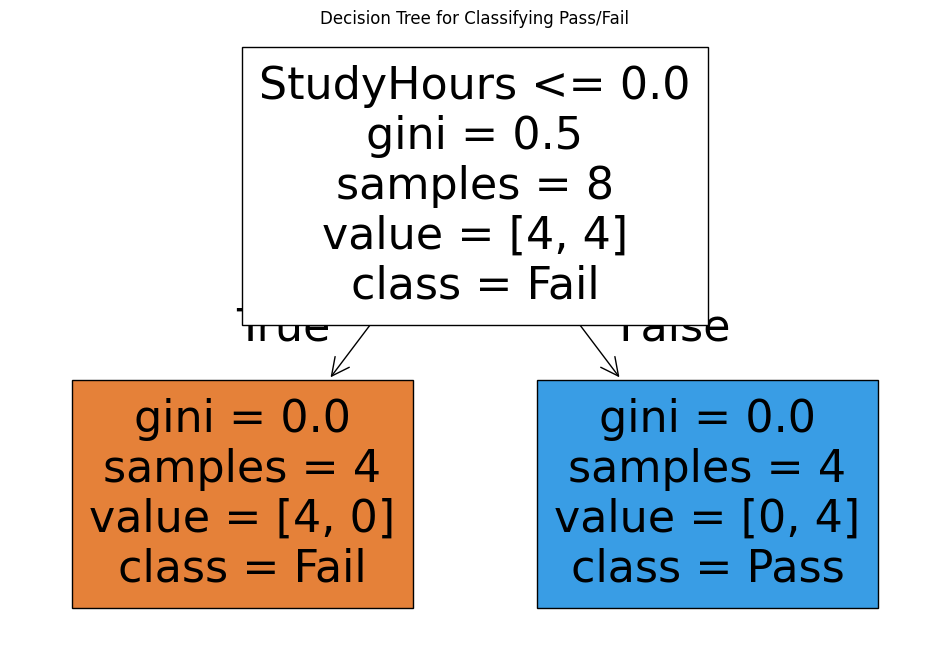

In [11]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)

plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

<h3>9. Tuning the decision tree</h3>

In [12]:
#limit the tress depth to avoid overfitting
model_tuned = DecisionTreeClassifier(max_depth=3, random_state=42)

#Train the model on training data
model_tuned.fit(X_train_scaled, y_train)

#make predictions on the tuned model
y_pred_tuned = model_tuned.predict(X_test_scaled)

#Evaluate a tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Tuned Model): {accuracy_tuned}")

Accuracy (Tuned Model): 1.0
